<a href="https://colab.research.google.com/github/vsnikhil/ML/blob/nbs/classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [29]:
cols = ['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data',names=cols)
# df.head()
len(df.index)

19020

In [30]:
df.loc[df['class']=='h']

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12332,93.7035,37.9432,3.1454,0.1680,0.1011,53.2566,89.0566,11.8175,14.1224,231.9028,h
12333,102.0005,22.0017,3.3161,0.1064,0.0724,-54.0862,43.0553,-15.0647,88.4636,274.9392,h
12334,100.2775,21.8784,3.1100,0.3120,0.1446,-48.1834,57.6547,-9.6341,20.7848,346.4330,h
12335,91.6558,18.8293,2.7097,0.4386,0.3420,-52.6841,-97.8373,-17.0955,63.8834,130.7998,h
12336,38.0195,12.6736,2.8747,0.4084,0.1928,-51.4840,8.3471,7.9620,24.5402,163.8674,h
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [31]:
df['class'] = (df['class'] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


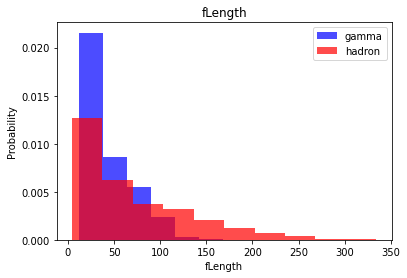

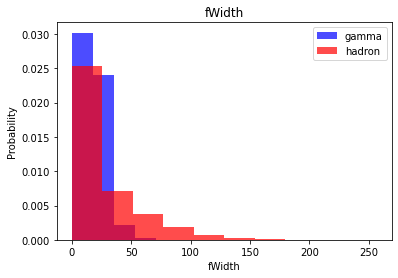

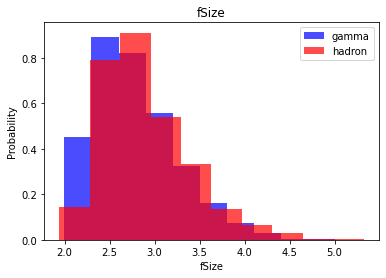

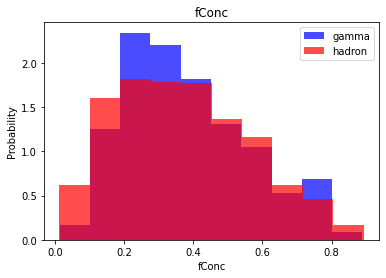

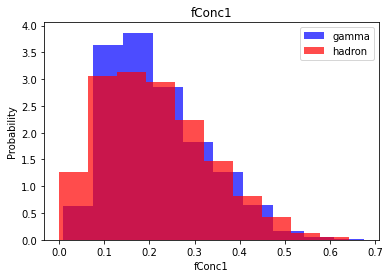

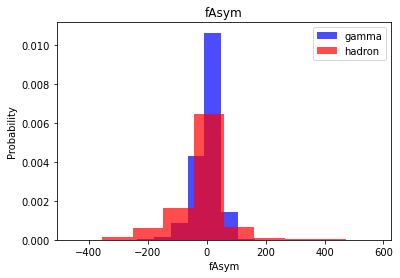

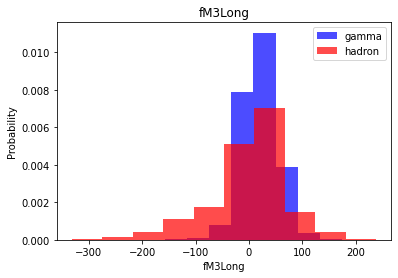

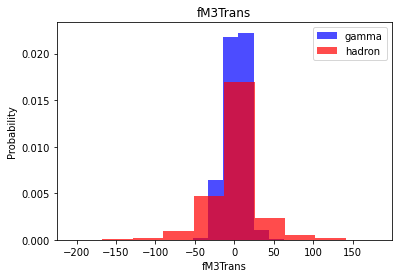

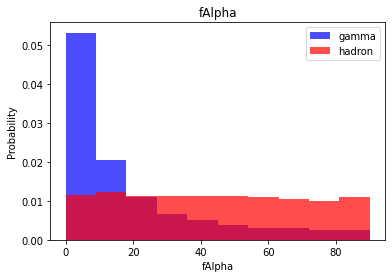

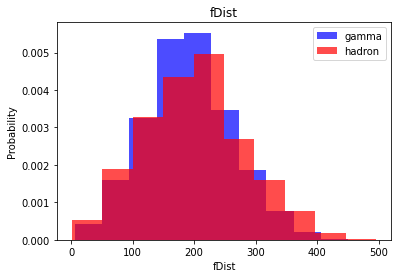

In [32]:
for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel('Probability')
  plt.xlabel(label)
  plt.legend()
  plt.show()

**Train, Validation and Test** **Data**

In [44]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [46]:
def scale_dataset(df, oversample=False):
  X = df[df.columns[:-1]].values
  Y = df[df.columns[-1]].values

  sc = StandardScaler()
  X = sc.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,Y = ros.fit_resample(X,Y)

  data = np.hstack((X, np.reshape(Y, (-1,1))))
  return data,X,Y

In [41]:
print(len(train[train['class']==1])) #num of gammas
print(len(train[train['class']==0])) #num of hadrons
#using oversampling as class='1' are about 7000 and class='0' are 4000

7407
4005


In [47]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=True)
test, X_test, Y_test = scale_dataset(test, oversample=True)

**kNN**

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier()

In [60]:
Y_pred = knn_model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      2417
           1       0.77      0.85      0.81      2417

    accuracy                           0.80      4834
   macro avg       0.80      0.80      0.80      4834
weighted avg       0.80      0.80      0.80      4834



**Naive Bayes**

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,Y_train)

In [67]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.41      0.54      2417
           1       0.60      0.90      0.72      2417

    accuracy                           0.65      4834
   macro avg       0.70      0.65      0.63      4834
weighted avg       0.70      0.65      0.63      4834



**Logistic Regression**

In [70]:
from sklearn.linear_model import LogisticRegression

In [72]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, Y_train)

In [74]:
Y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75      2417
           1       0.74      0.82      0.78      2417

    accuracy                           0.76      4834
   macro avg       0.77      0.76      0.76      4834
weighted avg       0.77      0.76      0.76      4834



**SVM**

In [75]:
from sklearn.svm import SVC

In [76]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, Y_train)

In [77]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2417
           1       0.82      0.90      0.86      2417

    accuracy                           0.85      4834
   macro avg       0.85      0.85      0.85      4834
weighted avg       0.85      0.85      0.85      4834



Neural Net

In [78]:
import tensorflow as tf

In [81]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [89]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_acccuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [80]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss = 'binary_crossentropy',
                 metrics=['accuracy'])

In [91]:
history = nn_model.fit(
    X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)#verbose = 0 so it doesn't print entire epoch

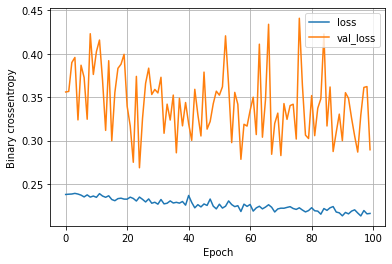

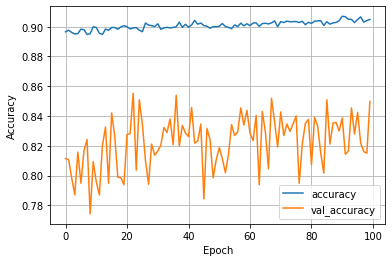

In [92]:
plot_loss(history)
plot_acccuracy(history)

In [98]:
# variying layer size and lr can affect out training and accuracy
def train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      #randomly selects certain nodes to not train to avoid overfitting
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch_size 32


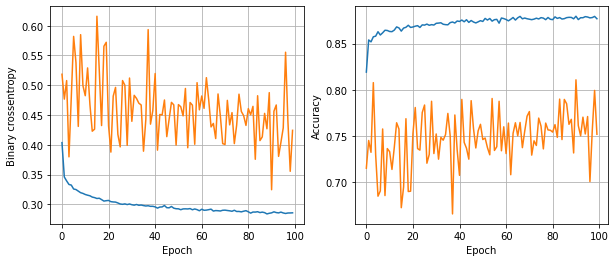

157/157 [==============================] - 0s 2ms/step - loss: 0.3459 - accuracy: 0.8454
16 nodes, dropout 0, lr 0.01, batch_size 64


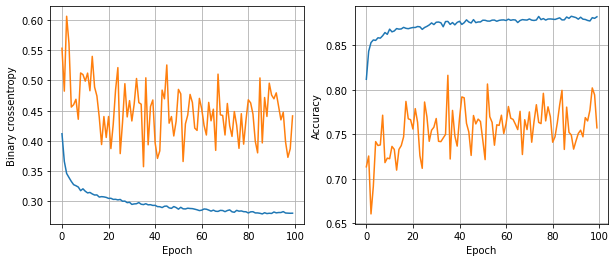

157/157 [==============================] - 0s 1ms/step - loss: 0.3530 - accuracy: 0.8460
16 nodes, dropout 0, lr 0.01, batch_size 128


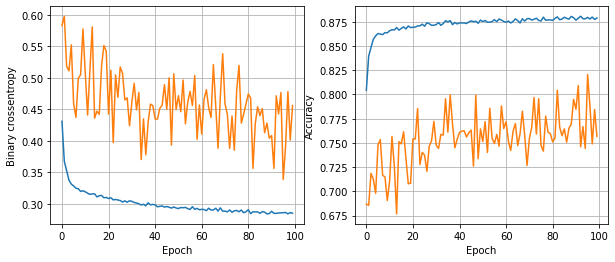

157/157 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8406
16 nodes, dropout 0, lr 0.005, batch_size 32


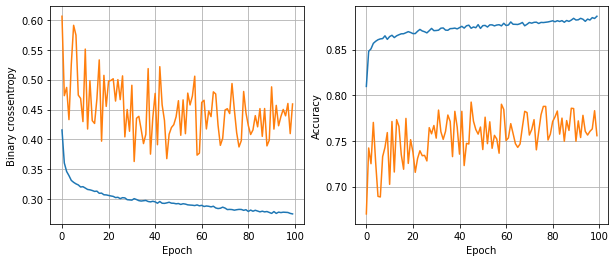

157/157 [==============================] - 0s 1ms/step - loss: 0.3658 - accuracy: 0.8400
16 nodes, dropout 0, lr 0.005, batch_size 64


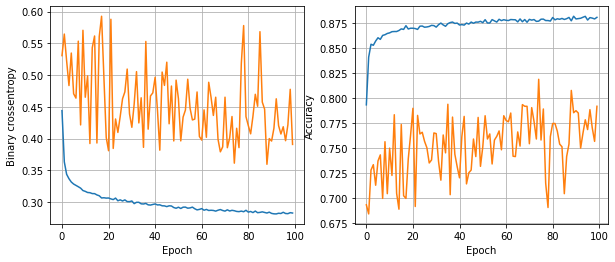

157/157 [==============================] - 0s 2ms/step - loss: 0.3458 - accuracy: 0.8586
16 nodes, dropout 0, lr 0.005, batch_size 128


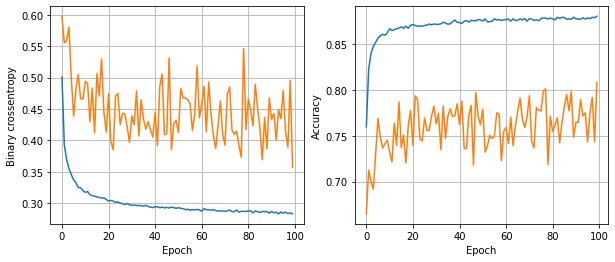

157/157 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8524
16 nodes, dropout 0, lr 0.001, batch_size 32


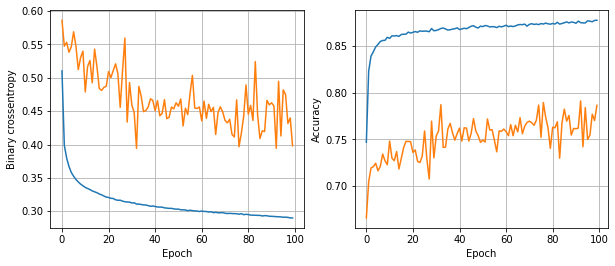

157/157 [==============================] - 0s 2ms/step - loss: 0.3415 - accuracy: 0.8526
16 nodes, dropout 0, lr 0.001, batch_size 64


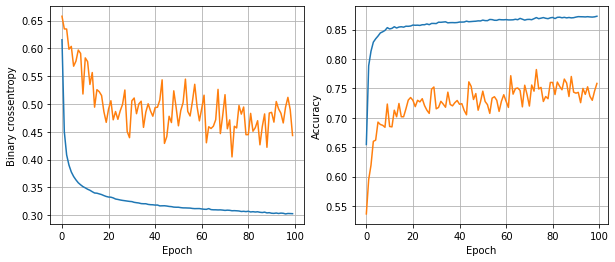

157/157 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8470
16 nodes, dropout 0, lr 0.001, batch_size 128


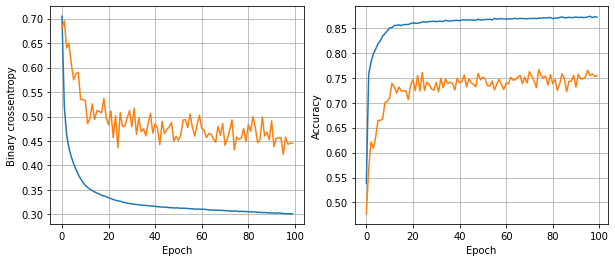

157/157 [==============================] - 0s 2ms/step - loss: 0.3414 - accuracy: 0.8542
16 nodes, dropout 0.2, lr 0.01, batch_size 32


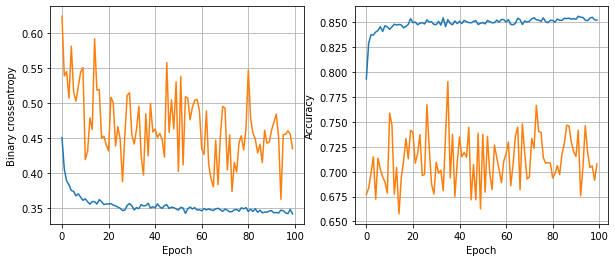

157/157 [==============================] - 0s 2ms/step - loss: 0.3536 - accuracy: 0.8365
16 nodes, dropout 0.2, lr 0.01, batch_size 64


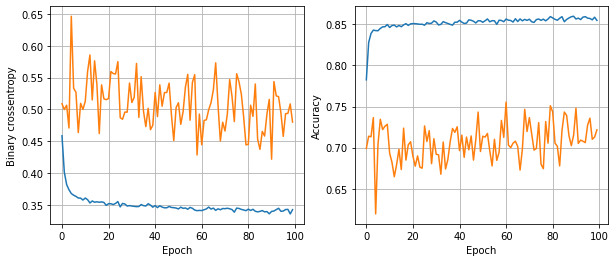

157/157 [==============================] - 0s 2ms/step - loss: 0.3523 - accuracy: 0.8502
16 nodes, dropout 0.2, lr 0.01, batch_size 128


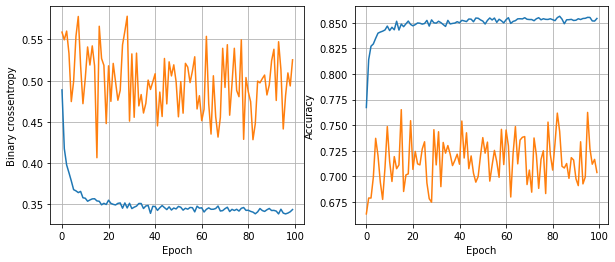

157/157 [==============================] - 0s 2ms/step - loss: 0.3668 - accuracy: 0.8351
16 nodes, dropout 0.2, lr 0.005, batch_size 32


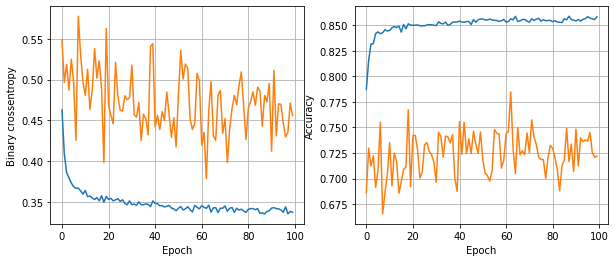

157/157 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8385
16 nodes, dropout 0.2, lr 0.005, batch_size 64


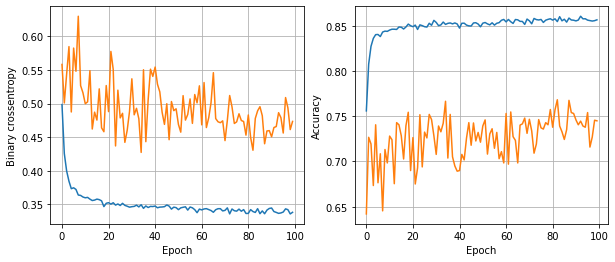

157/157 [==============================] - 0s 2ms/step - loss: 0.3551 - accuracy: 0.8500
16 nodes, dropout 0.2, lr 0.005, batch_size 128


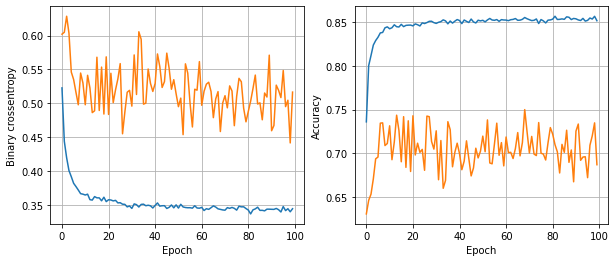

157/157 [==============================] - 0s 2ms/step - loss: 0.3641 - accuracy: 0.8289
16 nodes, dropout 0.2, lr 0.001, batch_size 32


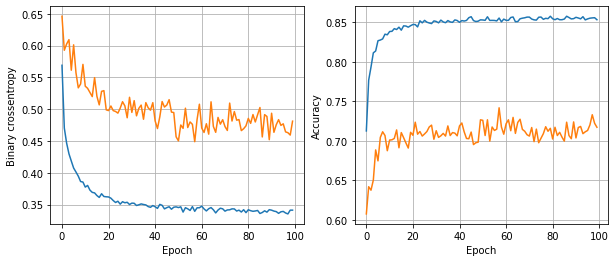

157/157 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8476
16 nodes, dropout 0.2, lr 0.001, batch_size 64


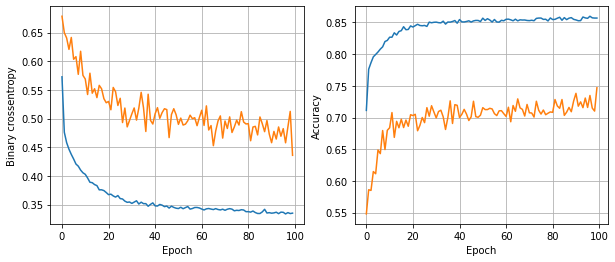

157/157 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8516
16 nodes, dropout 0.2, lr 0.001, batch_size 128


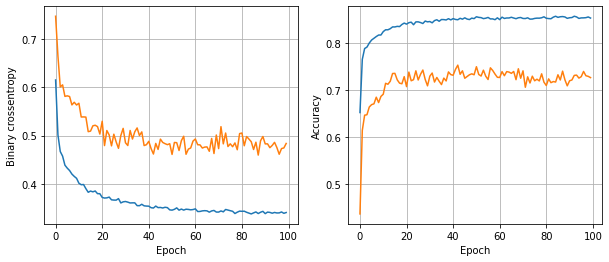

157/157 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8428
32 nodes, dropout 0, lr 0.01, batch_size 32


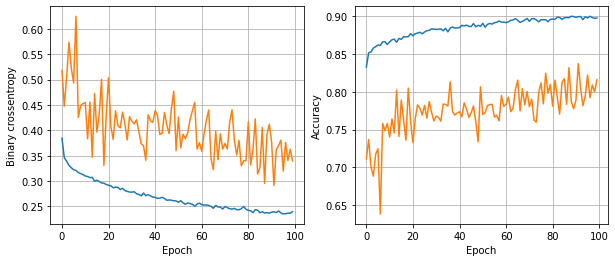

157/157 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8474
32 nodes, dropout 0, lr 0.01, batch_size 64


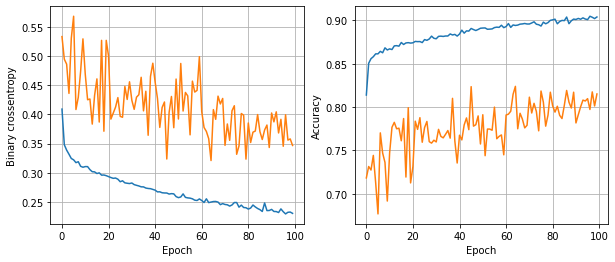

157/157 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8430
32 nodes, dropout 0, lr 0.01, batch_size 128


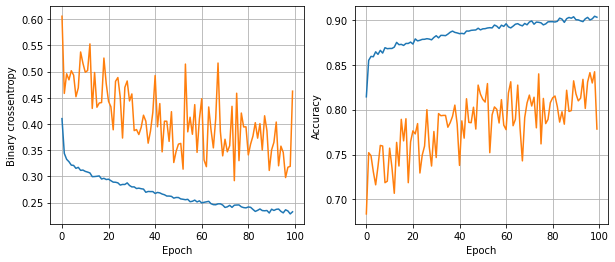

157/157 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8424
32 nodes, dropout 0, lr 0.005, batch_size 32


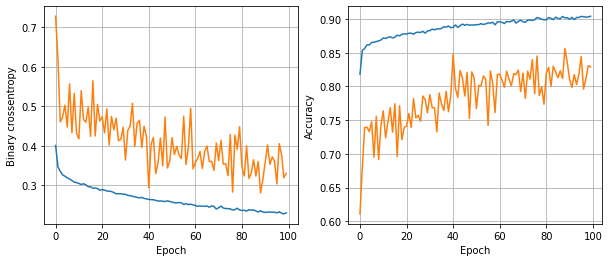

157/157 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8502
32 nodes, dropout 0, lr 0.005, batch_size 64


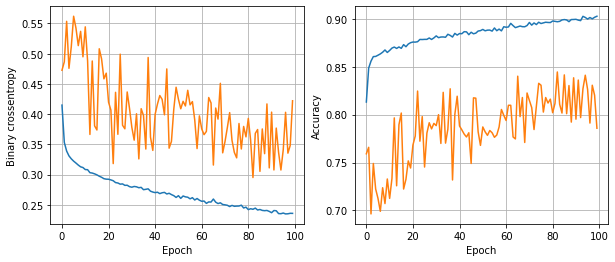

157/157 [==============================] - 0s 2ms/step - loss: 0.4070 - accuracy: 0.8448
32 nodes, dropout 0, lr 0.005, batch_size 128


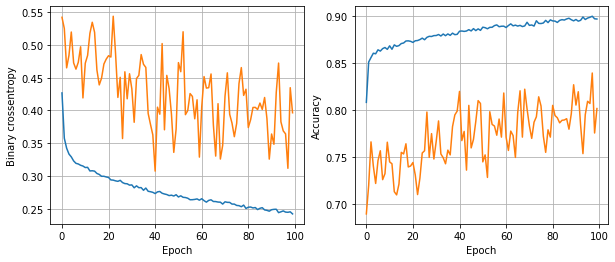

157/157 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8492
32 nodes, dropout 0, lr 0.001, batch_size 32


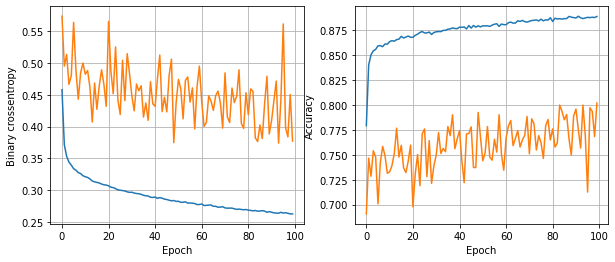

157/157 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.8586
32 nodes, dropout 0, lr 0.001, batch_size 64


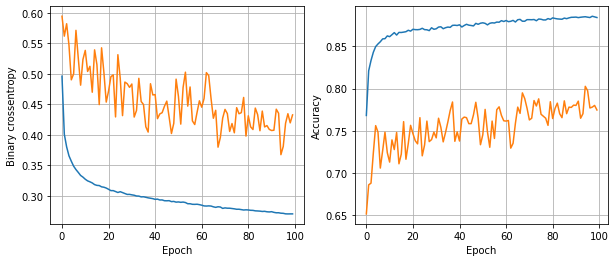

157/157 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8534
32 nodes, dropout 0, lr 0.001, batch_size 128


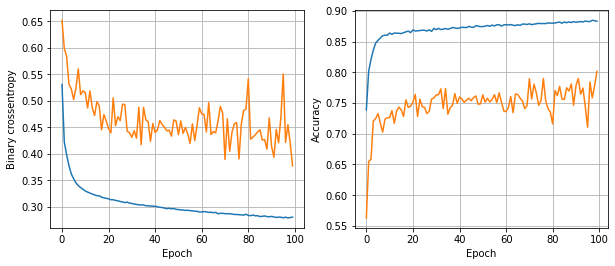

157/157 [==============================] - 0s 2ms/step - loss: 0.3379 - accuracy: 0.8536
32 nodes, dropout 0.2, lr 0.01, batch_size 32


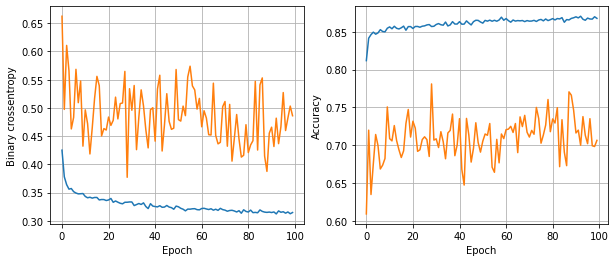

157/157 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8412
32 nodes, dropout 0.2, lr 0.01, batch_size 64


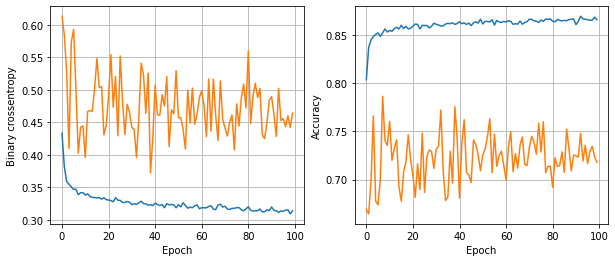

157/157 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8345
32 nodes, dropout 0.2, lr 0.01, batch_size 128


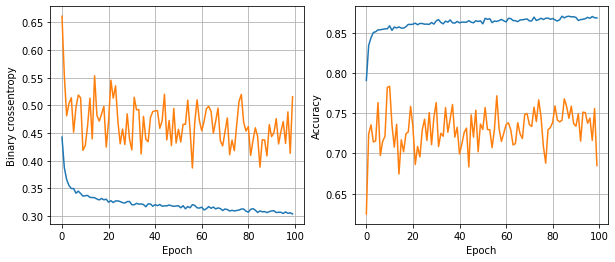

157/157 [==============================] - 0s 2ms/step - loss: 0.3742 - accuracy: 0.8235
32 nodes, dropout 0.2, lr 0.005, batch_size 32


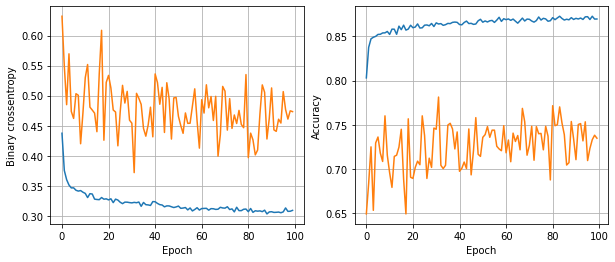

157/157 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8510
32 nodes, dropout 0.2, lr 0.005, batch_size 64


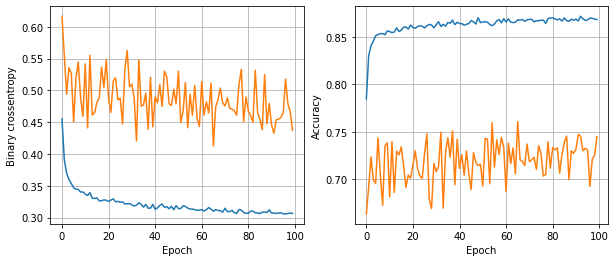

157/157 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8530
32 nodes, dropout 0.2, lr 0.005, batch_size 128


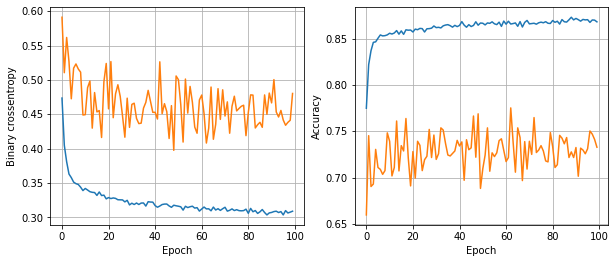

157/157 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8434
32 nodes, dropout 0.2, lr 0.001, batch_size 32


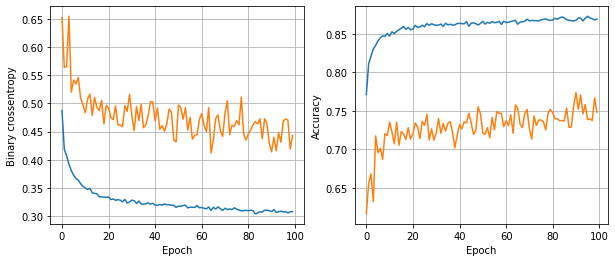

157/157 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8542
32 nodes, dropout 0.2, lr 0.001, batch_size 64


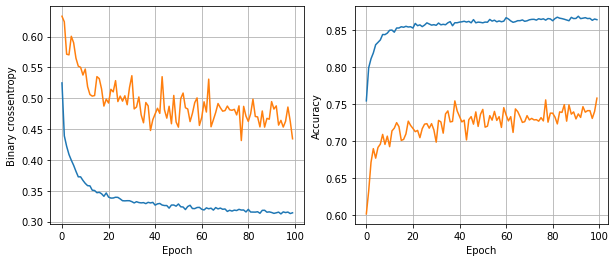

157/157 [==============================] - 0s 2ms/step - loss: 0.3417 - accuracy: 0.8484
32 nodes, dropout 0.2, lr 0.001, batch_size 128


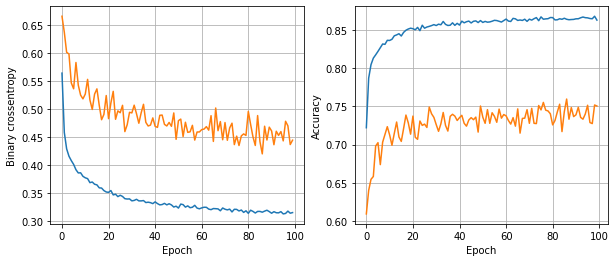

157/157 [==============================] - 0s 2ms/step - loss: 0.3410 - accuracy: 0.8550
64 nodes, dropout 0, lr 0.01, batch_size 32


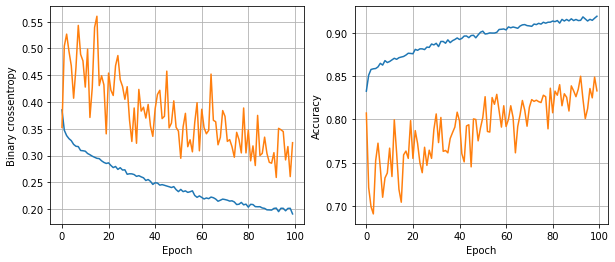

157/157 [==============================] - 0s 2ms/step - loss: 0.5678 - accuracy: 0.8402
64 nodes, dropout 0, lr 0.01, batch_size 64


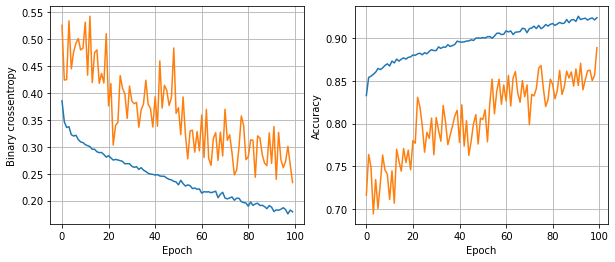

157/157 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.8464
64 nodes, dropout 0, lr 0.01, batch_size 128


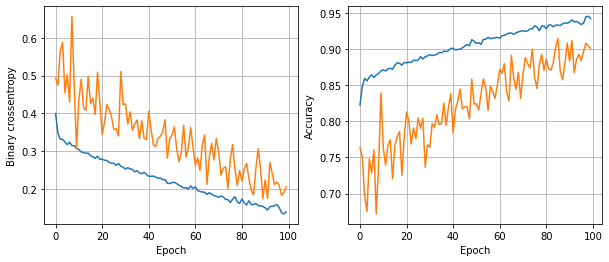

157/157 [==============================] - 0s 2ms/step - loss: 0.6434 - accuracy: 0.8400
64 nodes, dropout 0, lr 0.005, batch_size 32


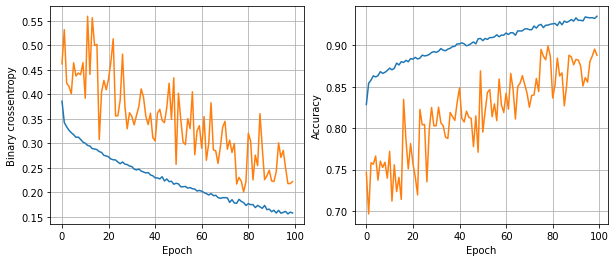

157/157 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.8379
64 nodes, dropout 0, lr 0.005, batch_size 64


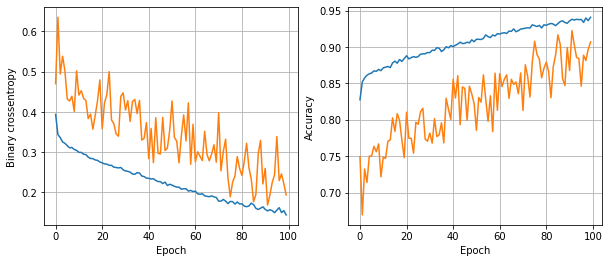

157/157 [==============================] - 0s 2ms/step - loss: 0.5231 - accuracy: 0.8375
64 nodes, dropout 0, lr 0.005, batch_size 128


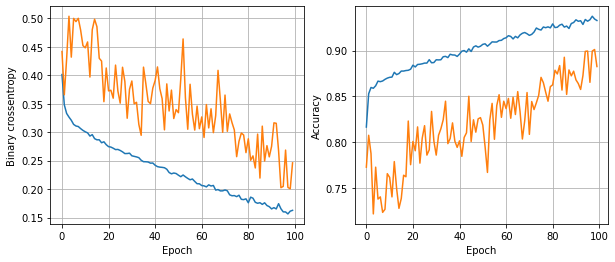

157/157 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.8394
64 nodes, dropout 0, lr 0.001, batch_size 32


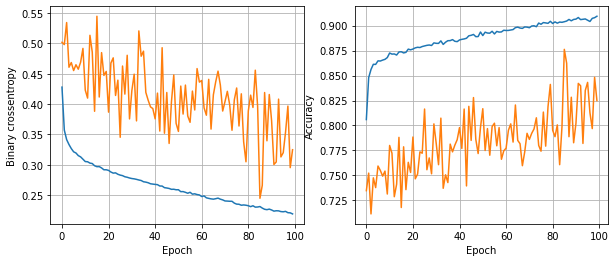

157/157 [==============================] - 0s 2ms/step - loss: 0.3968 - accuracy: 0.8383
64 nodes, dropout 0, lr 0.001, batch_size 64


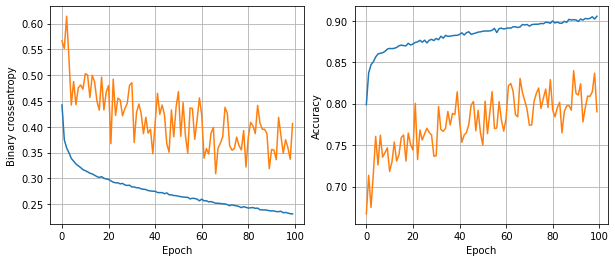

157/157 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8508
64 nodes, dropout 0, lr 0.001, batch_size 128


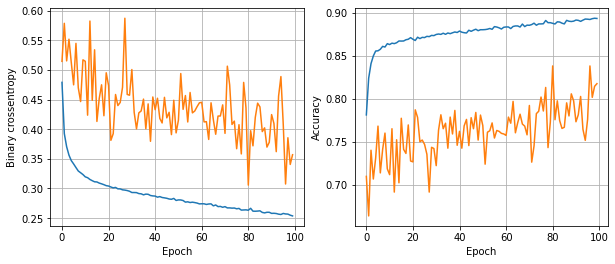

157/157 [==============================] - 0s 2ms/step - loss: 0.3413 - accuracy: 0.8572
64 nodes, dropout 0.2, lr 0.01, batch_size 32


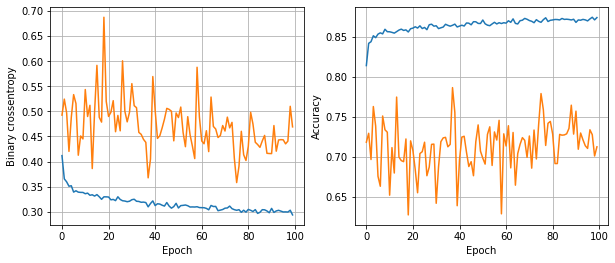

157/157 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8398
64 nodes, dropout 0.2, lr 0.01, batch_size 64


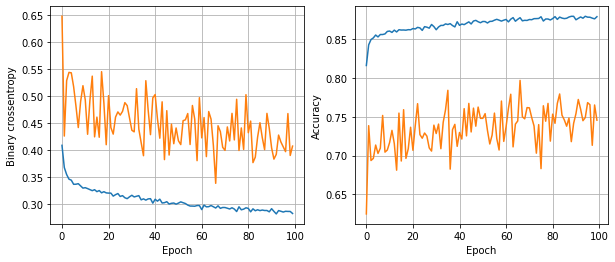

157/157 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8448
64 nodes, dropout 0.2, lr 0.01, batch_size 128


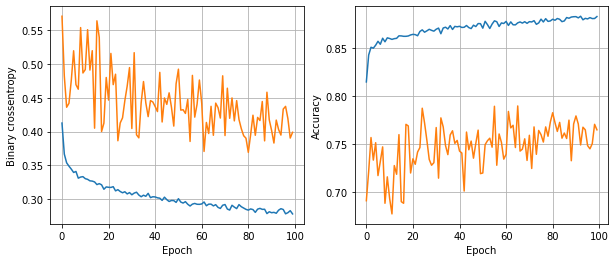

157/157 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8444
64 nodes, dropout 0.2, lr 0.005, batch_size 32


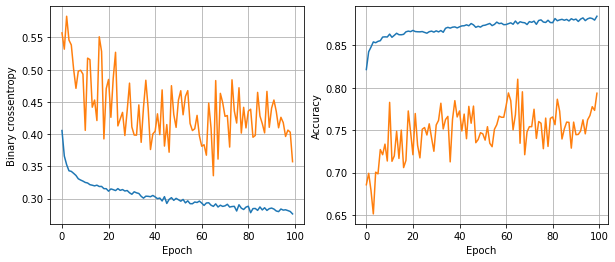

157/157 [==============================] - 0s 2ms/step - loss: 0.3281 - accuracy: 0.8624
64 nodes, dropout 0.2, lr 0.005, batch_size 64


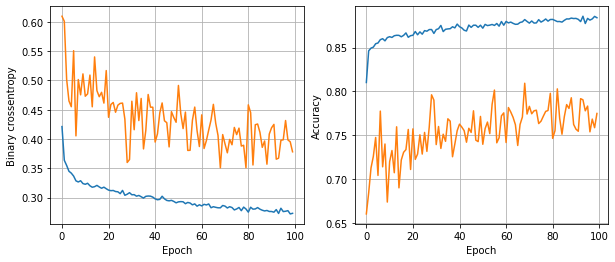

157/157 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8484
64 nodes, dropout 0.2, lr 0.005, batch_size 128


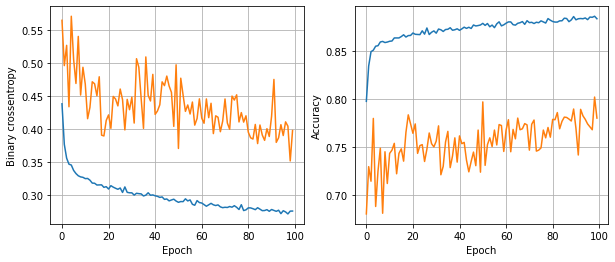

157/157 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8564
64 nodes, dropout 0.2, lr 0.001, batch_size 32


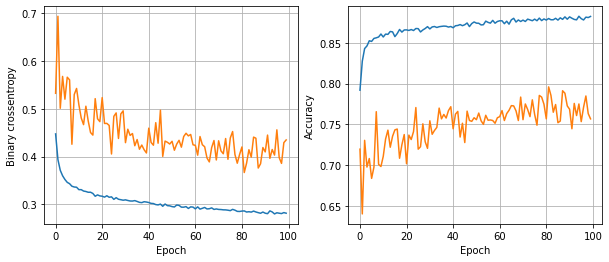

157/157 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8486
64 nodes, dropout 0.2, lr 0.001, batch_size 64


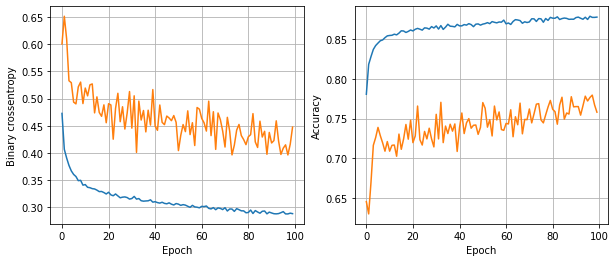

157/157 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.8554
64 nodes, dropout 0.2, lr 0.001, batch_size 128


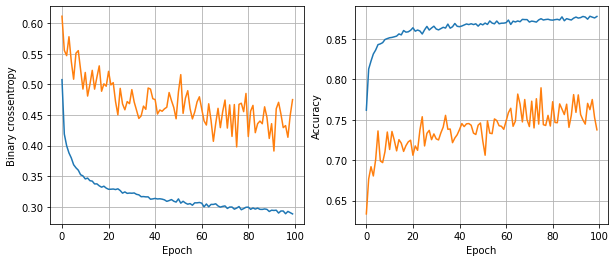

157/157 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8472


In [101]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
        model, history = train_model(X_train, Y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, Y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [103]:
Y_pred = least_loss_model.predict(X_test)
Y_pred = (Y_pred > 0.5).astype(int).reshape(-1,)
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      2417
           1       0.80      0.94      0.87      2417

    accuracy                           0.85      4834
   macro avg       0.87      0.85      0.85      4834
weighted avg       0.87      0.85      0.85      4834

